# Time Series Graphs for Gun Sales and Gun Violence Cases

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


******************Import Data*******************************

In [2]:
#Read Gun Sales data
sales = pd.read_csv('salesGuns.csv')

In [3]:
#Read average income data for 50 states
income = pd.read_csv('Income.csv')

In [4]:
# Read Gun Violence incidents data
violence = pd.read_csv('Gun_Violence.csv')

************************Data Cleaning and Manipulation**********************************

In [5]:
# Subsetting violence incidents for period between 2014 and 2016
violence_filtered= violence[violence['date'].str.contains('2014') 
            |violence['date'].str.contains('2015') |violence['date'].str.contains('2016') ]

In [6]:
# Subsetting gun sales for period between 2014 and 2016
sales_filtered = sales[sales['month'].str.contains('2014') 
               |sales['month'].str.contains('2015') |sales['month'].str.contains('2016') ] 

In [7]:
# Create 'YYYY-MM' period column from 'YYYY-MM-DD' date column
violence_filtered['period']=violence_filtered['date'].str[0:7]

C:\Users\sagar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [8]:
###Groupby Violence incidents on Period column###
timedataViolence=violence_filtered.groupby('period')['incident_id'].nunique()

In [9]:
#Groupby totals sales on month column##
timedataSales=sales_filtered.groupby('month')['totals'].sum()

# Regression Analysis and Clustering

In [10]:
#Subset dataframe
gunsales = pd.DataFrame(sales_filtered,columns=['state','permit','permit_recheck','totals'])

In [11]:
gunviolence = pd.DataFrame(violence_filtered,columns=['incident_id','state','participant_age','participant_gender'])

In [12]:
# Grouping data on State level
gunsales_grouped = gunsales.groupby('state')['permit','permit_recheck','totals'].sum()

In [13]:
# Removing rows of data with NaN
gunviolence=gunviolence.dropna()

**Data Manipulation and Cleaning***

In [14]:
gunviolence['age_1']=gunviolence['participant_age'].str[0:5]

In [15]:
gunviolence[['Participant_No','Participant_1_age']]=gunviolence['age_1'].str.split('::',expand=True)

In [16]:
gunviolence[['Age_2','Age_3']]=gunviolence['Participant_1_age'].str.split('|',expand=True)

In [17]:
gunviolence['gender_1']=gunviolence['participant_gender'].str[0:9]

In [18]:
gunviolence['gender_2']=gunviolence['gender_1'].str[3:]

In [19]:
gunviolence[['gender_3','gender_4','gender_5']]=gunviolence['gender_2'].str.split('|',expand=True)

In [20]:
gunviolence_2 = pd.DataFrame(gunviolence,columns=['incident_id','state','Age_2','gender_3'])

In [21]:
xy=pd.get_dummies(gunviolence_2['gender_3'])
xy=pd.DataFrame(xy,columns=['Female','Male'])

In [22]:
gunviolence_2=gunviolence_2.join(xy)

In [23]:
gunviolence_2=gunviolence_2.dropna()

In [24]:
gunviolence_2['Age_2']=gunviolence_2['Age_2'].astype(int)

In [25]:
gunviolence_pivot=pd.pivot_table(gunviolence_2, index=['state'], values=['incident_id','Age_2','Female','Male'], aggfunc={"incident_id":np.count_nonzero,"Age_2":np.mean,"Female":np.sum,"Male":np.sum}, fill_value=0)

In [26]:
print(gunviolence_pivot)

                          Age_2  Female  Male  incident_id
state                                                     
Alabama               31.767745     309  1607         1916
Alaska                32.067340      95   499          594
Arizona               32.141089     143   665          808
Arkansas              32.440737     189   950         1139
California            30.676773     652  4889         5541
Colorado              32.850761     157   828          985
Connecticut           29.716148     113  1268         1381
Delaware              27.535260      87   778          865
District of Columbia  28.052910      32   346          378
Florida               31.307633     840  4321         5162
Georgia               30.197814     659  3092         3751
Hawaii                36.662069      27   118          145
Idaho                 33.589172      47   267          314
Illinois              26.875570     857  8569         9427
Indiana               30.409131     341  1937         22

In [27]:
print(income)

             State   2015`
0          Alabama  45,051
1           Alaska  73,449
2          Arizona  53,314
3         Arkansas  44,929
4       California  64,133
5         Colorado  66,595
6      Connecticut  73,621
7         Delaware  58,283
8             D.C.  70,386
9          Florida  49,132
10         Georgia  51,725
11          Hawaii  69,889
12           Idaho  54,339
13        Illinois  59,412
14         Indiana  52,486
15            Iowa  59,775
16          Kansas  55,517
17        Kentucky  43,889
18       Louisiana  43,897
19           Maine  51,559
20        Maryland  75,167
21   Massachusetts  68,336
22        Michigan  54,901
23       Minnesota  69,329
24     Mississippi  39,218
25        Missouri  57,457
26         Montana  53,642
27        Nebraska  59,422
28          Nevada  52,887
29   New Hampshire  75,767
30      New Jersey  67,944
31      New Mexico  47,157
32        New York  58,412
33  North Carolina  50,878
34    North Dakota  59,964
35            Ohio  52,763
3

In [28]:
income.head()

,State,2015`
0,Alabama,"45,051"
1,Alaska,"73,449"
2,Arizona,"53,314"
3,Arkansas,"44,929"
4,California,"64,133"


In [29]:
print(gunsales_grouped)

                         permit  permit_recheck   totals
state                                                   
Alabama                741515.0             0.0  1975761
Alaska                   8517.0             0.0   260891
Arizona                191677.0          5109.0  1058393
Arkansas               159371.0          7036.0   757642
California            2458224.0             0.0  5612862
Colorado               188340.0             0.0  1407860
Connecticut            412848.0             0.0   895739
Delaware                15428.0             0.0   152796
District of Columbia      172.0             0.0     2129
Florida                742697.0             0.0  3616968
Georgia                582393.0             0.0  1664511
Guam                        0.0             0.0     6249
Hawaii                  47118.0             0.0    47196
Idaho                  100845.0            44.0   425031
Illinois              2745110.0        419341.0  4515564
Indiana               1845218.0

In [30]:
gundataframe = pd.merge(gunsales_grouped,gunviolence_pivot, on='state', how='inner')

In [31]:
print(gundataframe)

                         permit  permit_recheck   totals      Age_2  Female  \
state                                                                         
Alabama                741515.0             0.0  1975761  31.767745     309   
Alaska                   8517.0             0.0   260891  32.067340      95   
Arizona                191677.0          5109.0  1058393  32.141089     143   
Arkansas               159371.0          7036.0   757642  32.440737     189   
California            2458224.0             0.0  5612862  30.676773     652   
Colorado               188340.0             0.0  1407860  32.850761     157   
Connecticut            412848.0             0.0   895739  29.716148     113   
Delaware                15428.0             0.0   152796  27.535260      87   
District of Columbia      172.0             0.0     2129  28.052910      32   
Florida                742697.0             0.0  3616968  31.307633     840   
Georgia                582393.0             0.0  166

In [32]:
gundataframe_2 = pd.merge(gundataframe,income, left_on='state', right_on='State', how='inner')

In [33]:
print(gundataframe_2)

       permit  permit_recheck   totals      Age_2  Female  Male  incident_id  \
0    741515.0             0.0  1975761  31.767745     309  1607         1916   
1      8517.0             0.0   260891  32.067340      95   499          594   
2    191677.0          5109.0  1058393  32.141089     143   665          808   
3    159371.0          7036.0   757642  32.440737     189   950         1139   
4   2458224.0             0.0  5612862  30.676773     652  4889         5541   
5    188340.0             0.0  1407860  32.850761     157   828          985   
6    412848.0             0.0   895739  29.716148     113  1268         1381   
7     15428.0             0.0   152796  27.535260      87   778          865   
8    742697.0             0.0  3616968  31.307633     840  4321         5162   
9    582393.0             0.0  1664511  30.197814     659  3092         3751   
10    47118.0             0.0    47196  36.662069      27   118          145   
11   100845.0            44.0   425031  

In [34]:
gundataframe_2.head()

,permit,permit_recheck,totals,Age_2,Female,Male,incident_id,State,2015`
0,741515.0,0.0,1975761,31.767745,309,1607,1916,Alabama,"45,051"
1,8517.0,0.0,260891,32.067340,95,499,594,Alaska,"73,449"
2,191677.0,5109.0,1058393,32.141089,143,665,808,Arizona,"53,314"
3,159371.0,7036.0,757642,32.440737,189,950,1139,Arkansas,"44,929"
4,2458224.0,0.0,5612862,30.676773,652,4889,5541,California,"64,133"


In [35]:
#gundataframe_2 = gundataframe_2.rename(columns={'2015: 'newName1', 'oldName2': 'newName2'})


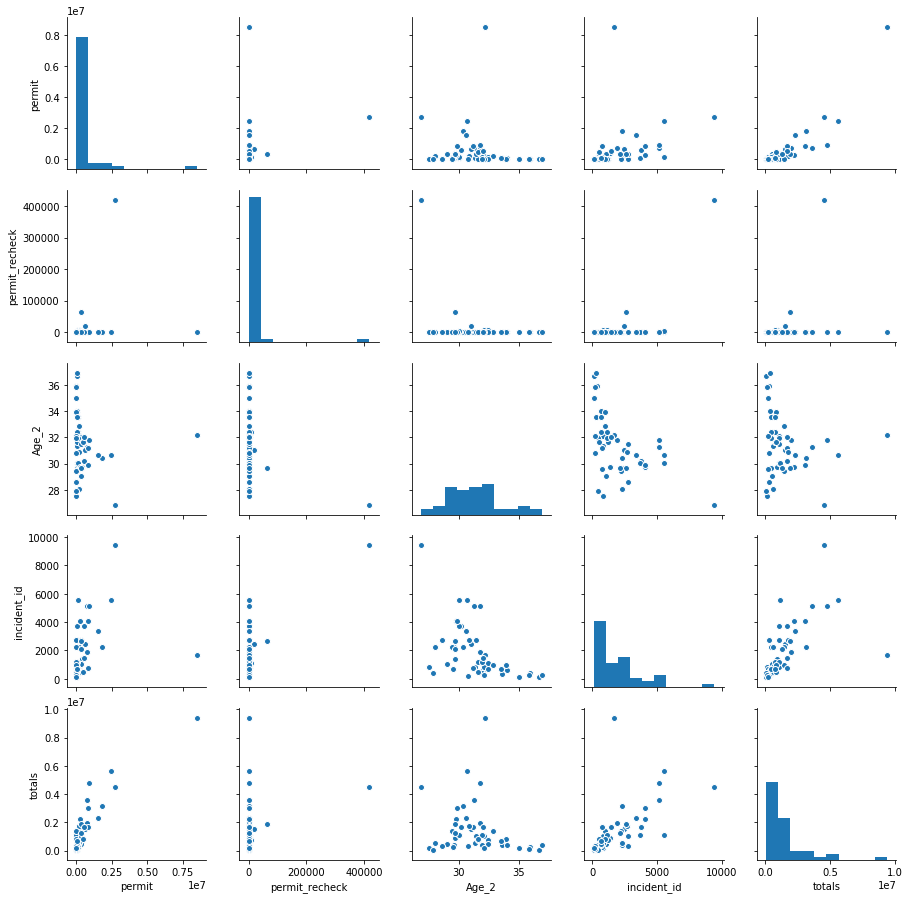

In [36]:
sns.pairplot(gundataframe_2[['permit', 'permit_recheck', 'Age_2', '2015`', 'incident_id','totals']])

In [37]:
import statsmodels.formula.api as sm

In [66]:
result = sm.ols(formula="incident_id ~   Age_2 + totals  + permit + permit_recheck ", data=gundataframe_2).fit()

In [67]:
print (result.summary())

                            OLS Regression Results                            
Dep. Variable:            incident_id   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     46.82
Date:                Fri, 20 Jul 2018   Prob (F-statistic):           1.75e-15
Time:                        21:59:37   Log-Likelihood:                -406.11
No. Observations:                  50   AIC:                             822.2
Df Residuals:                      45   BIC:                             831.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       7452.8863   1867.329      3.

In [40]:
gundataframe_2

,permit,permit_recheck,totals,Age_2,Female,Male,incident_id,State,2015`
0,741515.0,0.0,1975761,31.767745,309,1607,1916,Alabama,"45,051"
1,8517.0,0.0,260891,32.067340,95,499,594,Alaska,"73,449"
2,191677.0,5109.0,1058393,32.141089,143,665,808,Arizona,"53,314"
3,159371.0,7036.0,757642,32.440737,189,950,1139,Arkansas,"44,929"
4,2458224.0,0.0,5612862,30.676773,652,4889,5541,California,"64,133"
5,188340.0,0.0,1407860,32.850761,157,828,985,Colorado,"66,595"
6,412848.0,0.0,895739,29.716148,113,1268,1381,Connecticut,"73,621"
7,15428.0,0.0,152796,27.535260,87,778,865,Delaware,"58,283"
8,742697.0,0.0,3616968,31.307633,840,4321,5162,Florida,"49,132"
9,582393.0,0.0,1664511,30.197814,659,3092,3751,Georgia,"51,725"


In [42]:
gundataframe_3=pd.DataFrame(gundataframe_2,columns=['permit','permit_recheck','totals','Age_2','Female','Male','incident_id','2015`'])

In [43]:
gundataframe_3["2015`"] = gundataframe_3["2015`"].str.replace(",","").astype(float)

In [44]:
gundataframe_3.head()

,permit,permit_recheck,totals,Age_2,Female,Male,incident_id,2015`
0,741515.0,0.0,1975761,31.767745,309,1607,1916,45051.0
1,8517.0,0.0,260891,32.067340,95,499,594,73449.0
2,191677.0,5109.0,1058393,32.141089,143,665,808,53314.0
3,159371.0,7036.0,757642,32.440737,189,950,1139,44929.0
4,2458224.0,0.0,5612862,30.676773,652,4889,5541,64133.0


In [45]:
import copy
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

In [46]:
from sklearn.cluster import KMeans

In [47]:
gundataframe_3['Cluster']=0

In [48]:
#get one data point (i.e., row) from the dataframe
rel_cols=['permit', 'permit_recheck', 'totals', 'Age_2','2015`']
gundataframe_3.loc[1,rel_cols].tolist()

[8517.0, 0.0, 260891.0, 32.06734006734007, 73449.0]

In [49]:
gundataframe_3.head()

,permit,permit_recheck,totals,Age_2,Female,Male,incident_id,2015`,Cluster
0,741515.0,0.0,1975761,31.767745,309,1607,1916,45051.0,0
1,8517.0,0.0,260891,32.067340,95,499,594,73449.0,0
2,191677.0,5109.0,1058393,32.141089,143,665,808,53314.0,0
3,159371.0,7036.0,757642,32.440737,189,950,1139,44929.0,0
4,2458224.0,0.0,5612862,30.676773,652,4889,5541,64133.0,0


In [50]:
gundataframe_3['2015`'].to_csv('unknownCol.csv')

In [1]:
sns.pairplot(x_vars=rel_cols, y_vars=rel_cols, data=gundataframe_3, hue="Cluster", size=1)

NameError: name 'sns' is not defined

In [52]:
#Using other libraries
from sklearn.cluster import KMeans

#Determining number of clusters
nClusters=range(2,10)
sumDistances=[]
for n in nClusters:
    kmeans=KMeans(n_clusters=n).fit(gundataframe_3[rel_cols])
    sumDistances.append(kmeans.inertia_) #Proxy for SSE
print(sumDistances)    

[89278158469472.17, 28764601922288.406, 15586954247393.795, 9524287902056.156, 6960644503166.172, 5056423943010.07, 3673234319584.117, 2942116499615.8926]


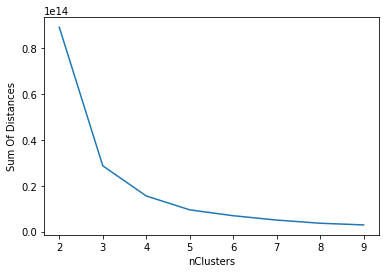

In [53]:
plt.plot(nClusters,sumDistances,'-')
plt.xlabel('nClusters')
plt.ylabel('Sum Of Distances')
plt.show()

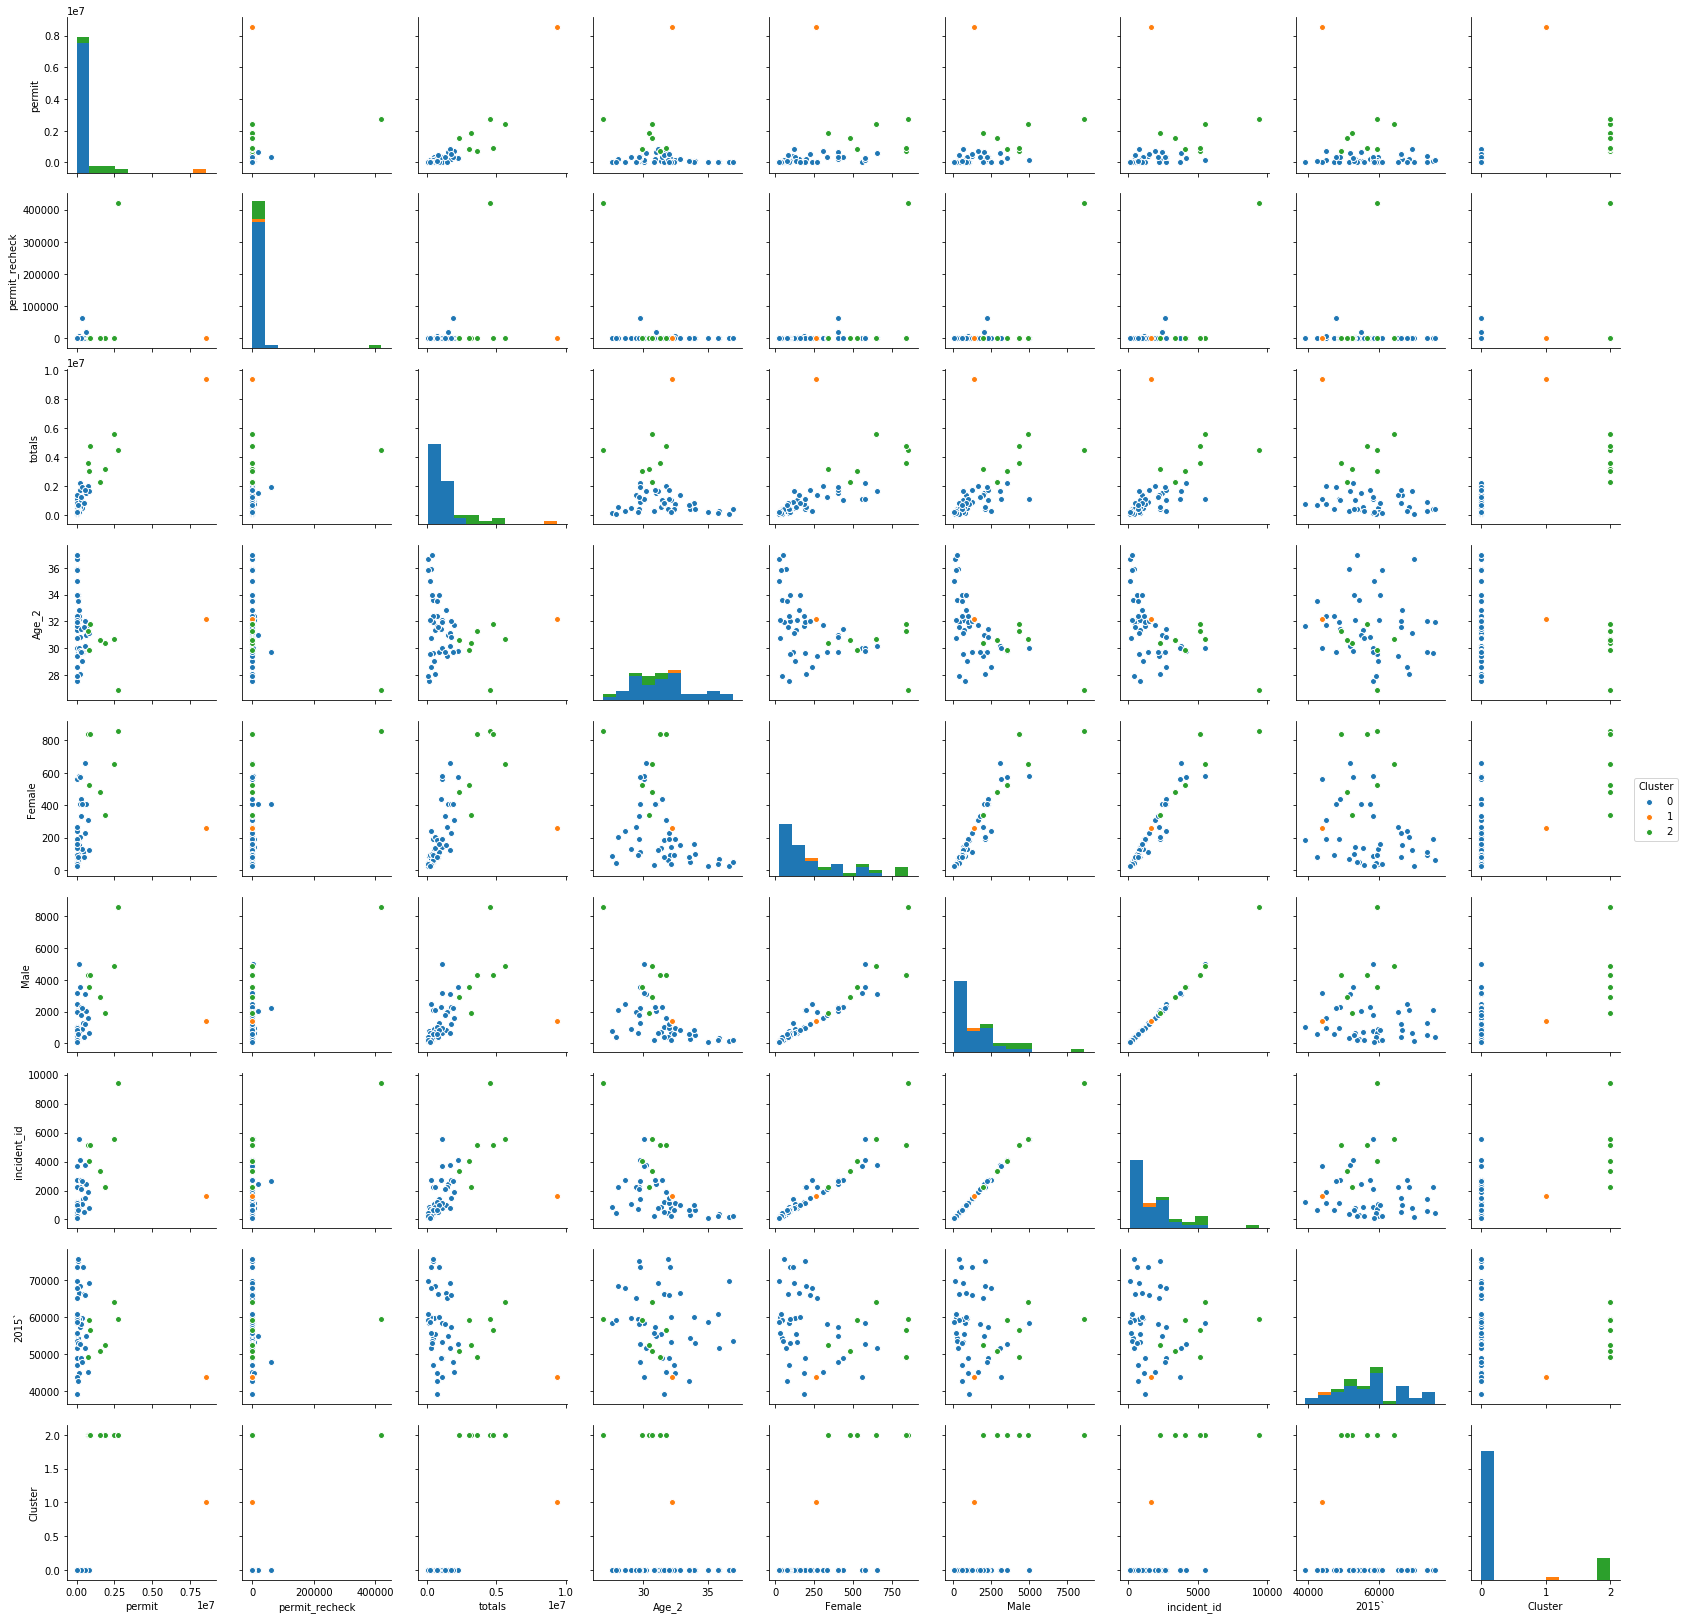

In [54]:
kmeans=KMeans(n_clusters=3).fit(gundataframe_3)
gundataframe_3['Cluster']=kmeans.labels_
g = sns.pairplot(gundataframe_3,hue='Cluster')

In [63]:
laws=pd.read_csv('gunlaws.csv')

In [64]:
laws=pd.DataFrame(laws,columns=['State','Rate','Gun laws'])

In [65]:
laws

,State,Rate,Gun laws
0,Alabama,21.5,10
1,Alaska,23.3,3
2,Arizona,15.2,8
3,Arkansas,17.8,11
4,California,7.9,107
5,Colorado,14.3,30
6,Connecticut,4.6,90
7,Delaware,11.0,40
8,Florida,12.6,21
9,Georgia,15.0,6


In [69]:
gundataframe_2.head()

,permit,permit_recheck,totals,Age_2,Female,Male,incident_id,State,2015`
0,741515.0,0.0,1975761,31.767745,309,1607,1916,Alabama,"45,051"
1,8517.0,0.0,260891,32.067340,95,499,594,Alaska,"73,449"
2,191677.0,5109.0,1058393,32.141089,143,665,808,Arizona,"53,314"
3,159371.0,7036.0,757642,32.440737,189,950,1139,Arkansas,"44,929"
4,2458224.0,0.0,5612862,30.676773,652,4889,5541,California,"64,133"


# merging the dataframes,  gundataframe_3 and gunlaws

In [71]:
gundataframe_2 = pd.merge(gundataframe_2,laws, left_on='State', right_on='State', how='inner')

In [72]:
gundataframe_2.head()

,permit,permit_recheck,totals,Age_2,Female,Male,incident_id,State,2015`,Rate,Gun laws
0,741515.0,0.0,1975761,31.767745,309,1607,1916,Alabama,"45,051",21.5,10
1,8517.0,0.0,260891,32.067340,95,499,594,Alaska,"73,449",23.3,3
2,191677.0,5109.0,1058393,32.141089,143,665,808,Arizona,"53,314",15.2,8
3,159371.0,7036.0,757642,32.440737,189,950,1139,Arkansas,"44,929",17.8,11
4,2458224.0,0.0,5612862,30.676773,652,4889,5541,California,"64,133",7.9,107


In [73]:
gundataframe_2["2015`"] = gundataframe_2["2015`"].str.replace(",","").astype(float)

In [75]:
gundataframe_2.head()

,permit,permit_recheck,totals,Age_2,Female,Male,incident_id,State,2015`,Rate,Gun laws
0,741515.0,0.0,1975761,31.767745,309,1607,1916,Alabama,45051.0,21.5,10
1,8517.0,0.0,260891,32.067340,95,499,594,Alaska,73449.0,23.3,3
2,191677.0,5109.0,1058393,32.141089,143,665,808,Arizona,53314.0,15.2,8
3,159371.0,7036.0,757642,32.440737,189,950,1139,Arkansas,44929.0,17.8,11
4,2458224.0,0.0,5612862,30.676773,652,4889,5541,California,64133.0,7.9,107


State No_of_incidents Mean_Age No_of_permits No_of_permit_rechecks Total_gun_sales Median_income Female_perc Male_perc

In [76]:
gundataframe_2.rename(columns={'incident_id':'No_of_incidents','permit_recheck':'No_of_permit_rechecks','Age_2':'Mean_Age','permit':'No_of_permits','totals':'Total_gun_sales','2015`':'Median_income'}, inplace=True)


In [77]:
gundataframe_2.head()

,No_of_permits,No_of_permit_rechecks,Total_gun_sales,Mean_Age,Female,Male,No_of_incidents,State,Median_income,Rate,Gun laws
0,741515.0,0.0,1975761,31.767745,309,1607,1916,Alabama,45051.0,21.5,10
1,8517.0,0.0,260891,32.067340,95,499,594,Alaska,73449.0,23.3,3
2,191677.0,5109.0,1058393,32.141089,143,665,808,Arizona,53314.0,15.2,8
3,159371.0,7036.0,757642,32.440737,189,950,1139,Arkansas,44929.0,17.8,11
4,2458224.0,0.0,5612862,30.676773,652,4889,5541,California,64133.0,7.9,107


In [78]:
gundataframe_2['Male_perc']=gundataframe_2['Male']/(gundataframe_2['Female']+gundataframe_2['Male'])

In [79]:
gundataframe_2['Female_perc']=gundataframe_2['Female']/(gundataframe_2['Female']+gundataframe_2['Male'])

In [80]:
gundataframe_2.head()

,No_of_permits,No_of_permit_rechecks,Total_gun_sales,Mean_Age,Female,Male,No_of_incidents,State,Median_income,Rate,Gun laws,Male_perc,Female_perc
0,741515.0,0.0,1975761,31.767745,309,1607,1916,Alabama,45051.0,21.5,10,0.838727,0.161273
1,8517.0,0.0,260891,32.067340,95,499,594,Alaska,73449.0,23.3,3,0.840067,0.159933
2,191677.0,5109.0,1058393,32.141089,143,665,808,Arizona,53314.0,15.2,8,0.823020,0.176980
3,159371.0,7036.0,757642,32.440737,189,950,1139,Arkansas,44929.0,17.8,11,0.834065,0.165935
4,2458224.0,0.0,5612862,30.676773,652,4889,5541,California,64133.0,7.9,107,0.882332,0.117668
